<a href="https://colab.research.google.com/github/dhender77/Coursework/blob/main/Notebook6_Henderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name:
Date:

## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


The problem is determining from an Xray whether the patient has pnemonia or not

In [ ]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS 167/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS 167/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Build your CNN here
#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 32)               

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

<ipython-input-6-cd152d7a2853>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


Epoch 1/5
163/163 [==============================] - 924s 6s/step - loss: 0.3352 - accuracy: 0.8591 - val_loss: 0.9735 - val_accuracy: 0.6667
Epoch 2/5
163/163 [==============================] - 15s 92ms/step - loss: 0.1566 - accuracy: 0.9404 - val_loss: 0.9044 - val_accuracy: 0.7099
Epoch 3/5
163/163 [==============================] - 15s 92ms/step - loss: 0.1542 - accuracy: 0.9411 - val_loss: 0.7062 - val_accuracy: 0.7596
Epoch 4/5
163/163 [==============================] - 15s 91ms/step - loss: 0.1411 - accuracy: 0.9452 - val_loss: 0.9514 - val_accuracy: 0.7147
Epoch 5/5
163/163 [==============================] - 15s 91ms/step - loss: 0.1255 - accuracy: 0.9465 - val_loss: 0.8898 - val_accuracy: 0.7292


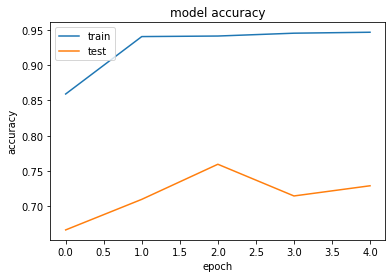

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model1.add(Dense(32)) #fully-connected layer
model1.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model1.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

<ipython-input-9-31e44f0b5caa>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model1.fit_generator(


Epoch 1/5
163/163 [==============================] - 19s 107ms/step - loss: 0.4985 - accuracy: 0.7780 - val_loss: 0.3825 - val_accuracy: 0.8237
Epoch 2/5
163/163 [==============================] - 16s 95ms/step - loss: 0.2288 - accuracy: 0.9051 - val_loss: 0.5739 - val_accuracy: 0.7468
Epoch 3/5
163/163 [==============================] - 15s 91ms/step - loss: 0.1503 - accuracy: 0.9419 - val_loss: 0.7105 - val_accuracy: 0.7516
Epoch 4/5
163/163 [==============================] - 15s 90ms/step - loss: 0.1382 - accuracy: 0.9467 - val_loss: 1.3068 - val_accuracy: 0.6779
Epoch 5/5
163/163 [==============================] - 16s 95ms/step - loss: 0.1393 - accuracy: 0.9450 - val_loss: 0.7093 - val_accuracy: 0.7628


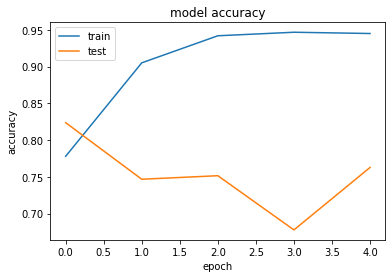

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

I added a third convolutional layer and a third pool layer. It seemed to do a little better. Maybe the third layer was able to find a couple niche features that helped it classify more accurately.

The highest accuracy I got was about .83